In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


In [2]:
# Create financial dataset

data = {
    "Company": ["M&S", "John Lewis"],
    
    # Sales revenue in billion GBP
    "Revenue (£bn)": [13.9, 12.8],
    
    # Profit margins (%)
    "Profit Margin (%)": [8.3, 2.0],
    
    # Estimated operating profit (£bn)
    "Operating Profit (£bn)": [1.15, 0.26],
    
    # Customer count (millions)
    "Customers (millions)": [32, 25],
    
    # Online sales percentage
    "Online Sales (%)": [34, 42]
}

financial_df = pd.DataFrame(data)

financial_df


,Company,Revenue (£bn),Profit Margin (%),Operating Profit (£bn),Customers (millions),Online Sales (%)
0,M&S,13.9,8.3,1.15,32,34
1,John Lewis,12.8,2.0,0.26,25,42


In [3]:
# Create customer demographic dataset

demographics = {
    "Company": ["M&S", "M&S", "M&S", "John Lewis", "John Lewis", "John Lewis"],
    
    "Age Group": [
        "18-30", "31-50", "51+",
        "18-30", "31-50", "51+"
    ],
    
    "Customer Percentage (%)": [
        25, 45, 30,
        30, 40, 30
    ],
    
    "Average Spending (£)": [
        450, 850, 700,
        500, 900, 750
    ]
}

demo_df = pd.DataFrame(demographics)

demo_df


,Company,Age Group,Customer Percentage (%),Average Spending (£)
0,M&S,18-30,25,450
1,M&S,31-50,45,850
2,M&S,51+,30,700
3,John Lewis,18-30,30,500
4,John Lewis,31-50,40,900
5,John Lewis,51+,30,750


In [4]:
# Generate monthly sales dataset

np.random.seed(42)

months = pd.date_range("2024-01-01", periods=12, freq="M")

ms_sales = np.random.normal(1.2, 0.15, 12)
jl_sales = np.random.normal(1.0, 0.12, 12)

sales_df = pd.DataFrame({
    "Month": months,
    "M&S Sales (£bn)": ms_sales,
    "John Lewis Sales (£bn)": jl_sales
})

sales_df


/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_49111/2389261968.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range("2024-01-01", periods=12, freq="M")


,Month,M&S Sales (£bn),John Lewis Sales (£bn)
0,2024-01-31,1.274507,1.029035
1,2024-02-29,1.179260,0.770406
2,2024-03-31,1.297153,0.793010
3,2024-04-30,1.428454,0.932525
4,2024-05-31,1.164877,0.878460
5,2024-06-30,1.164879,1.037710
6,2024-07-31,1.436882,0.891037
7,2024-08-31,1.315115,0.830524
8,2024-09-30,1.129579,1.175878
9,2024-10-31,1.281384,0.972907


In [5]:
# Calculate estimated profit

sales_df["M&S Profit (£bn)"] = sales_df["M&S Sales (£bn)"] * 0.083
sales_df["John Lewis Profit (£bn)"] = sales_df["John Lewis Sales (£bn)"] * 0.02

sales_df


,Month,M&S Sales (£bn),John Lewis Sales (£bn),M&S Profit (£bn),John Lewis Profit (£bn)
0,2024-01-31,1.274507,1.029035,0.105784,0.020581
1,2024-02-29,1.179260,0.770406,0.097879,0.015408
2,2024-03-31,1.297153,0.793010,0.107664,0.015860
3,2024-04-30,1.428454,0.932525,0.118562,0.018651
4,2024-05-31,1.164877,0.878460,0.096685,0.017569
5,2024-06-30,1.164879,1.037710,0.096685,0.020754
6,2024-07-31,1.436882,0.891037,0.119261,0.017821
7,2024-08-31,1.315115,0.830524,0.109155,0.016610
8,2024-09-30,1.129579,1.175878,0.093755,0.023518
9,2024-10-31,1.281384,0.972907,0.106355,0.019458


In [6]:
# Merge financial and demographic datasets

combined_df = pd.merge(
    demo_df,
    financial_df,
    on="Company",
    how="left"
)

combined_df


,Company,Age Group,Customer Percentage (%),Average Spending (£),Revenue (£bn),Profit Margin (%),Operating Profit (£bn),Customers (millions),Online Sales (%)
0,M&S,18-30,25,450,13.9,8.3,1.15,32,34
1,M&S,31-50,45,850,13.9,8.3,1.15,32,34
2,M&S,51+,30,700,13.9,8.3,1.15,32,34
3,John Lewis,18-30,30,500,12.8,2.0,0.26,25,42
4,John Lewis,31-50,40,900,12.8,2.0,0.26,25,42
5,John Lewis,51+,30,750,12.8,2.0,0.26,25,42


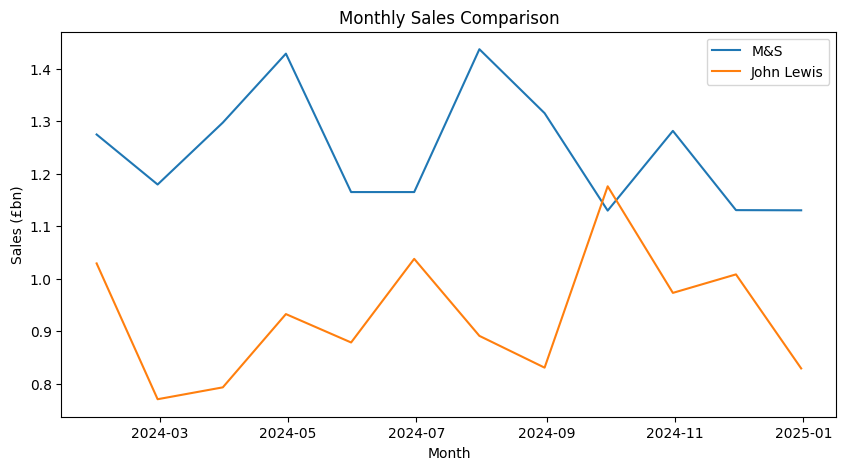

In [7]:
plt.figure(figsize=(10,5))

plt.plot(sales_df["Month"], sales_df["M&S Sales (£bn)"], label="M&S")
plt.plot(sales_df["Month"], sales_df["John Lewis Sales (£bn)"], label="John Lewis")

plt.title("Monthly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Sales (£bn)")
plt.legend()

plt.show()


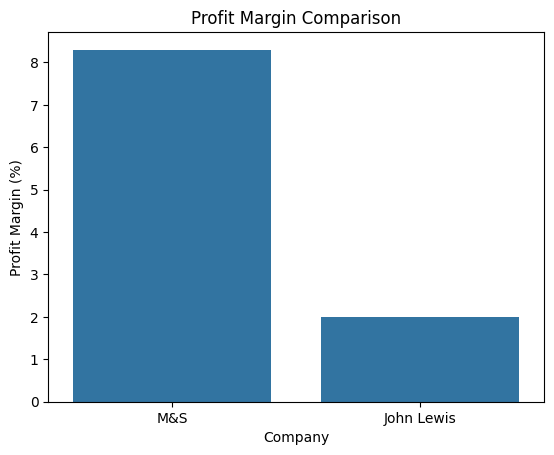

In [8]:
sns.barplot(
    data=financial_df,
    x="Company",
    y="Profit Margin (%)"
)

plt.title("Profit Margin Comparison")

plt.show()


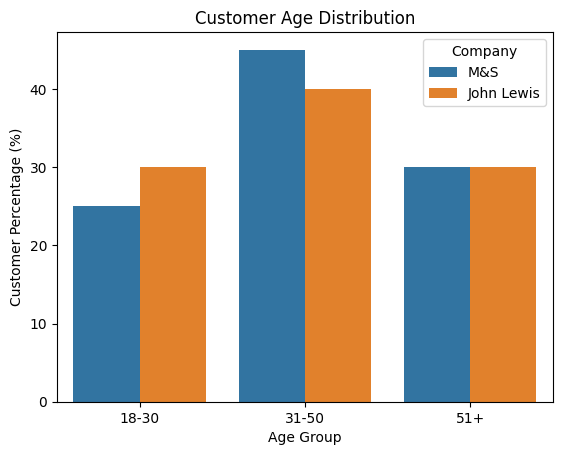

In [9]:
sns.barplot(
    data=demo_df,
    x="Age Group",
    y="Customer Percentage (%)",
    hue="Company"
)

plt.title("Customer Age Distribution")

plt.show()


In [10]:
financial_df.to_csv("financial_data.csv", index=False)
demo_df.to_csv("demographics_data.csv", index=False)
sales_df.to_csv("sales_data.csv", index=False)
combined_df.to_csv("combined_data.csv", index=False)

print("Datasets saved successfully")


Datasets saved successfully
